In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
import yfinance
import vectorbt as vbt
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('data\df.csv',sep='|')
data['date'] = pd.to_datetime(data['date'])

#plt.figure(figsize=(12, 6))
#plt.plot(ts)
#plt.title('Prix journaliers du S&P500')
#plt.show()

DXY = yfinance.download('DX-Y.NYB', start='1999-01-04', end='2025-09-19')
DXY = DXY.reset_index()[['Date','Close']]
DXY.columns = ['date','DXY']
data=data.merge(DXY, on='date', how='left')

GDPM = pd.read_csv('GDP Monthly.csv',sep=',')
GDPM['date'] = pd.to_datetime(GDPM['timestamp'])
GDPM['year'] = GDPM['date'].dt.year
GDPM['month'] = GDPM['date'].dt.month
GDPM['CroissM'] = GDPM['EIA/GDPQXUS/USA'].diff()

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

data = data.merge(GDPM, on=['year', 'month'], how='left')
data.drop(['timestamp','date_y','year','month'], axis=1, inplace=True)
data['DXY'].fillna(method='ffill', inplace=True)
data.set_index('date_x', inplace=True)

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HOME\AppData\Local\Temp\ipykernel_18156\2737568141.py:15: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('data\df.csv',sep='|')
[*********************100%***********************]  1 of 1 completed


SARIMAX : (sans le code qui optimise les données)
Prix cible : 6693.
(1,1,1) = 62471.633 (6691.68)
(2,1,1) = 62569.103 (6695.99)
(3,1,1) = 62434.749 (6690.88)
(4,1,1) = 62424.398 (6690.97)

(1,1,2) = 62432.014 (6690.70)
(1,1,3) = 62441.745 (6689.84)
(1,1,4) = 63080.847 (6679.74)

(2,1,2) = 67140.571 (6679.01)
(3,1,2) = 73526.320 (6653.08)
(4,1,2) = 73828.371 (6650.60)

(2,1,3) = 63628.154 (6680.44)
(2,1,4) = 63308.054 (6680.21)

(3,1,2) = 73526.320 (6653.08)
(3,1,3) = 63474.356 (6679.84)
(3,1,4) = 63801.005 (6682.05)

(4,1,3) = 65747.309 (6681.32)
(4,1,4) = 62756.699 (6682.55)

SARIMAX : (avec le code qui optimise les données)
Prix cible : 6691.
(1,1,1) = 62435.538 (6690.87)
(2,1,1) = 62432.247 (6689.72)
(3,1,1) = 62430.131 (6690.50)
(4,1,1) = 62418.825 (6690.62)

(1,1,2) = 62415.196 (6690.17)
(1,1,3) = 62400.380 (6689.43)
(1,1,4) = 62403.129 (6686.57)


SARIMAX : 
(1,0,1,5) = 62435.538 (6690.87)
(2,0,1,5) = 62393.235 (6690.45)
(3,0,1,5) = 62356.608 (6691.98)
(4,0,1,5) = 62298.040 (6691.60)

(1,0,2,5)= 62386.291 (6690.43)
(1,0,3,5)= 62331.620 (6691.78)
(1,0,4,5)= 62288.145 (6691.59)

(1,1,1)*(3,0,1,5) = 62356.608 (6691.98)
(2,1,1)* = 62331.584 (6690.63)
(3,1,1)* = 62318.968 (6689.36)
(4,1,1)* = 

(2,1,2)* = 62340.088 (6691.80)
(3,1,2)* = 62442.106 (6688.75)

SARIMAX Utilisé : 
(1,1,1)*(3,0,1,5)

✅ Prédiction faite pour 2023-01-20: 4116.9436
✅ Prédiction faite pour 2023-01-23: 4004.8303
✅ Prédiction faite pour 2023-01-24: 3999.7634
✅ Prédiction faite pour 2023-01-25: 4010.1979
✅ Prédiction faite pour 2023-01-26: 4054.3477
✅ Prédiction faite pour 2023-01-27: 4067.8113
✅ Prédiction faite pour 2023-01-30: 4024.9920
✅ Prédiction faite pour 2023-01-31: 4062.6573
✅ Prédiction faite pour 2023-02-01: 4103.3376
✅ Prédiction faite pour 2023-02-02: 4177.9228
✅ Prédiction faite pour 2023-02-03: 4116.9436
✅ Prédiction faite pour 2023-02-06: 4104.0300
✅ Prédiction faite pour 2023-02-07: 4153.0176
✅ Prédiction faite pour 2023-02-08: 4125.9722
✅ Prédiction faite pour 2023-02-09: 4087.8168
✅ Prédiction faite pour 2023-02-10: 4103.9516
✅ Prédiction faite pour 2023-02-13: 4118.2747
✅ Prédiction faite pour 2023-02-14: 4116.3845
✅ Prédiction faite pour 2023-02-15: 4151.7460
✅ Prédiction faite pour 2023-02-16: 4089.1619
✅ Prédiction faite pour 2023-02-17: 4099.9755
✅ Prédiction faite pour 2023-02-21

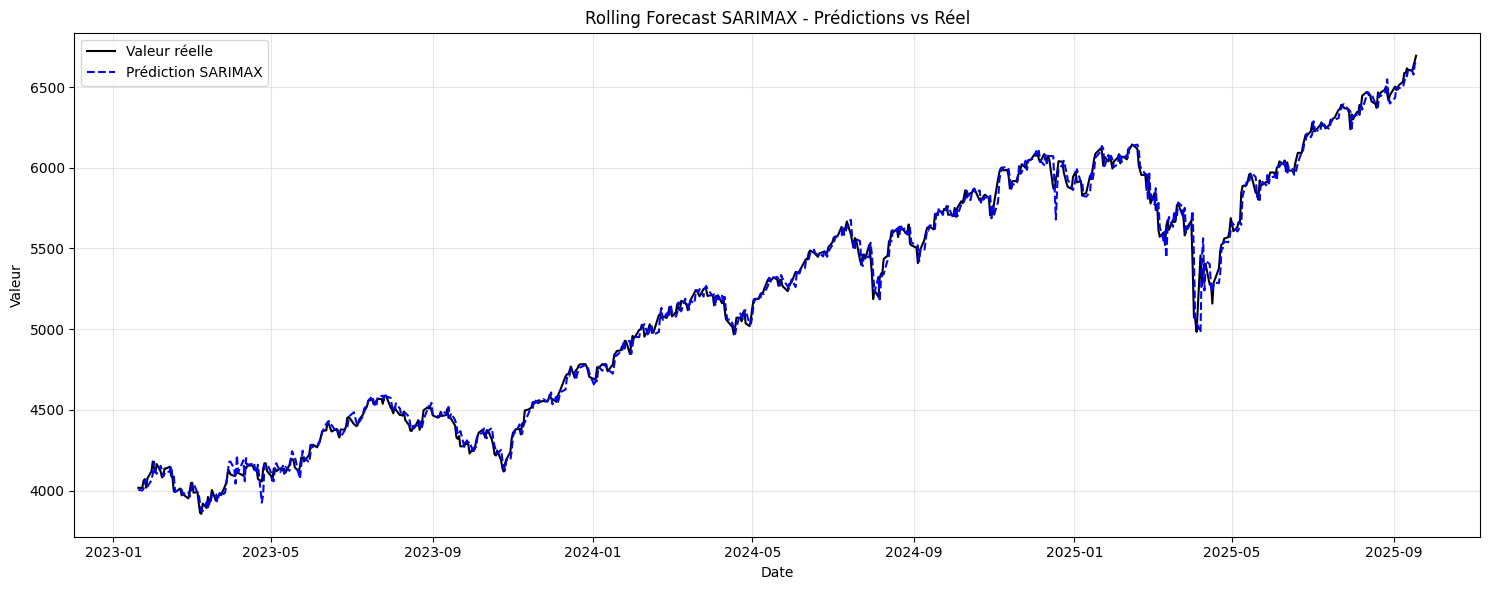

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import traceback

warnings.filterwarnings('ignore')

# === Paramètres === #
window_years = 3
trading_days_per_year = 250
window_size = window_years * trading_days_per_year

start_date = '2023-01-20'
end_date = '2025-09-18'

df = data.copy()

# Vérification de base
if 'cible' not in df.columns:
    raise ValueError("La colonne 'cible' doit être présente dans les données.")

features = df.drop(columns=['cible'])
target = df['cible']

# === Initialisation des listes === #
predictions = []
true_values = []
prediction_dates = []

# === Boucle Rolling Forecast === #
for current_date in pd.date_range(start=start_date, end=end_date, freq='B'):
    if current_date not in df.index:
        continue

    end_train_idx = df.index.get_loc(current_date)
    start_train_idx = end_train_idx - window_size

    if start_train_idx < 0:
        continue  # Pas assez d'historique

    # Définir les fenêtres d'entraînement et de test
    y_train = target.iloc[start_train_idx:end_train_idx]
    X_train = features.iloc[start_train_idx:end_train_idx]

    y_test = target.loc[current_date]
    X_test = features.loc[[current_date]]

    print(f"✅ Prédiction faite pour {current_date.date()}: {forecast:.4f}")


    # === Vérifications === #
    if y_train.isnull().any() or X_train.isnull().any().any():
        print(f"⚠️ NaNs dans les données d'entraînement à la date {current_date.date()}")
        continue

    if X_test.isnull().any().any():
        print(f"⚠️ NaNs dans les données de test à la date {current_date.date()}")
        continue

    if (X_train.nunique() <= 1).any():
        print(f"⚠️ Feature(s) constante(s) dans X_train à la date {current_date.date()}")
        continue

    # === Création et entraînement du modèle SARIMAX === #
    try:
        model = SARIMAX(
            endog=y_train,
            exog=X_train,
            order=(1, 1, 1),
            seasonal_order=(3, 0, 1, 5),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        result = model.fit(disp=False)

        # Prédiction pour le jour courant
        forecast = result.forecast(steps=1, exog=X_test).iloc[0]


        # Stockage des résultats
        predictions.append(forecast)
        true_values.append(y_test)
        prediction_dates.append(current_date)

    except Exception as e:
        print(f"\n❌ Erreur à la date {current_date.date()}:")
        traceback.print_exc()
        continue

# === Résultats === #
results = pd.DataFrame({
    'Valeur réelle': true_values,
    'Prédiction': predictions
}, index=prediction_dates)

# Métriques globales
mse = mean_squared_error(results['Valeur réelle'], results['Prédiction'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(results['Valeur réelle'], results['Prédiction'])

print("\n📊 Métriques de performance SARIMAX :")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")

# === Visualisation === #
plt.figure(figsize=(15, 6))
plt.plot(results.index, results['Valeur réelle'], label='Valeur réelle', color='black')
plt.plot(results.index, results['Prédiction'], label='Prédiction SARIMAX', color='blue', linestyle='--')
plt.title('Rolling Forecast SARIMAX - Prédictions vs Réel')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


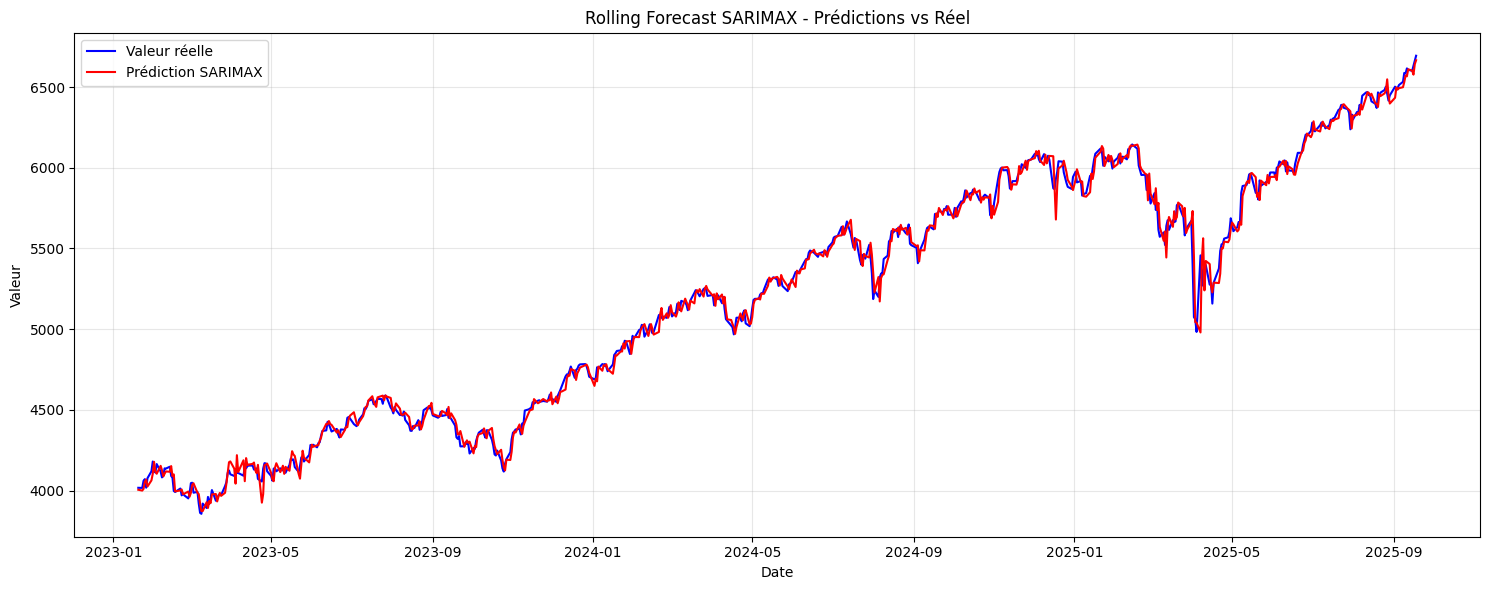

In [17]:
df = df.rename(columns={'Prédiction': 'prediction'})
results.to_csv('Test_SARIMAX.csv',sep='|')

# === Visualisation === #
plt.figure(figsize=(15, 6))
plt.plot(results.index, results['Valeur réelle'], label='Valeur réelle', color='blue')
plt.plot(results.index, results['Prédiction'], label='Prédiction SARIMAX', color='red')
plt.title('Rolling Forecast SARIMAX - Prédictions vs Réel')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()